In [412]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.cross_validation import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [413]:
df = pd.read_csv('lung_dataframe3.csv',converters={'Combined': lambda x: str(x),'State-county recode_x': lambda x: str(x)})
df_smoking = pd.read_excel('Smoking/smoking_estimates_means.xlsx')

In [414]:
df_overall = df_smoking[df_smoking.Sex=='Both']
df.head()

,Combined,2000_x,2001_x,2002_x,2003_x,2004_x,2005_x,2006_x,2007_x,2008_x,...,2003_air,2004_air,2005_air,2006_air,2007_air,2008_air,2009_air,2010_air,2011_air,radon_mean
0,060011,712570.0,723685.0,719473.0,714633.0,709953.0,707378.0,708331.0,714166.0,724542.0,...,12.459122,11.617424,11.197772,11.763339,11.182633,13.056139,10.936849,9.255255,10.494480,0.798333
1,060012,737270.0,745799.0,742633.0,739530.0,735768.0,734167.0,736153.0,741549.0,752666.0,...,12.459122,11.617424,11.197772,11.763339,11.182633,13.056139,10.936849,9.255255,10.494480,0.798333
2,060131,465370.0,474642.0,479169.0,482634.0,484591.0,487998.0,488399.0,492308.0,499205.0,...,11.686306,11.280479,9.983341,10.571953,9.570334,11.803685,9.876394,8.734441,9.389413,0.758333
3,060132,487440.0,496310.0,500693.0,504897.0,507833.0,511015.0,512435.0,516844.0,524139.0,...,11.686306,11.280479,9.983341,10.571953,9.570334,11.803685,9.876394,8.734441,9.389413,0.758333
4,060411,122708.0,122768.0,121811.0,121051.0,120073.0,120446.0,120587.0,121234.0,122209.0,...,11.146400,9.742963,9.081322,9.783707,8.996603,12.025891,10.376633,8.938352,9.304906,0.781034


In [415]:
df['State-county recode'] = df.Combined.str[:5]
df['Gender'] = df.Combined.str[5]
df.columns

Index(['Combined', '2000_x', '2001_x', '2002_x', '2003_x', '2004_x', '2005_x',
       '2006_x', '2007_x', '2008_x', '2009_x', '2010_x', '2011_x', '2012_x',
       '2013_x', '2014_x', 'State-county recode_x', '2000_y', '2001_y',
       '2002_y', '2003_y', '2004_y', '2005_y', '2006_y', '2007_y', '2008_y',
       '2009_y', '2010_y', '2011_y', '2012_y', '2013_y', '2014_y', '2000',
       '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009',
       '2010', '2011', '2012', '2013', '2014', 'State_and_county',
       '1996_smoking', '1997_smoking', '1998_smoking', '1999_smoking',
       '2000_smoking', '2001_smoking', '2002_smoking', '2003_smoking',
       '2004_smoking', '2005_smoking', '2006_smoking', '2007_smoking',
       '2008_smoking', '2009_smoking', '2010_smoking', '2011_smoking',
       '2012_smoking', '2001_air', '2002_air', '2003_air', '2004_air',
       '2005_air', '2006_air', '2007_air', '2008_air', '2009_air', '2010_air',
       '2011_air', 'radon_mean', 'State-

In [416]:
df['Smoking_mean'] = df[['1996_smoking', '1997_smoking', '1998_smoking', '1999_smoking', '2000_smoking', '2001_smoking', '2002_smoking', '2003_smoking', '2004_smoking', '2005_smoking']].mean(axis=1)
df['Air_mean'] = df[['2001_air','2002_air','2003_air','2004_air','2005_air']].mean(axis=1)
df.head()

,Combined,2000_x,2001_x,2002_x,2003_x,2004_x,2005_x,2006_x,2007_x,2008_x,...,2007_air,2008_air,2009_air,2010_air,2011_air,radon_mean,State-county recode,Gender,Smoking_mean,Air_mean
0,060011,712570.0,723685.0,719473.0,714633.0,709953.0,707378.0,708331.0,714166.0,724542.0,...,11.182633,13.056139,10.936849,9.255255,10.494480,0.798333,06001,1,21.77,12.494306
1,060012,737270.0,745799.0,742633.0,739530.0,735768.0,734167.0,736153.0,741549.0,752666.0,...,11.182633,13.056139,10.936849,9.255255,10.494480,0.798333,06001,2,15.66,12.494306
2,060131,465370.0,474642.0,479169.0,482634.0,484591.0,487998.0,488399.0,492308.0,499205.0,...,9.570334,11.803685,9.876394,8.734441,9.389413,0.758333,06013,1,21.02,11.609645
3,060132,487440.0,496310.0,500693.0,504897.0,507833.0,511015.0,512435.0,516844.0,524139.0,...,9.570334,11.803685,9.876394,8.734441,9.389413,0.758333,06013,2,15.67,11.609645
4,060411,122708.0,122768.0,121811.0,121051.0,120073.0,120446.0,120587.0,121234.0,122209.0,...,8.996603,12.025891,10.376633,8.938352,9.304906,0.781034,06041,1,18.89,10.405641


In [417]:
#df['2014'] = df['2014']*100000
y = df.pop('2014')
X = df[['Gender','2001_air','2002_air','2003_air','2004_air','2005_air','1996_smoking', '1997_smoking', '1998_smoking', '1999_smoking', '2000_smoking', '2001_smoking', '2002_smoking', '2003_smoking', '2004_smoking', '2005_smoking']]

In [418]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 17)

In [419]:
scaler = preprocessing.StandardScaler()
X_train[['2001_air','2002_air','2003_air','2004_air','2005_air','1996_smoking', '1997_smoking', '1998_smoking', '1999_smoking', '2000_smoking', '2001_smoking', '2002_smoking', '2003_smoking', '2004_smoking', '2005_smoking']] = scaler.fit_transform(X_train[['2001_air','2002_air','2003_air','2004_air','2005_air','1996_smoking', '1997_smoking', '1998_smoking', '1999_smoking', '2000_smoking', '2001_smoking', '2002_smoking', '2003_smoking', '2004_smoking', '2005_smoking']].as_matrix())
X_test[['2001_air','2002_air','2003_air','2004_air','2005_air','1996_smoking', '1997_smoking', '1998_smoking', '1999_smoking', '2000_smoking', '2001_smoking', '2002_smoking', '2003_smoking', '2004_smoking', '2005_smoking']] = scaler.fit_transform(X_test[['2001_air','2002_air','2003_air','2004_air','2005_air','1996_smoking', '1997_smoking', '1998_smoking', '1999_smoking', '2000_smoking', '2001_smoking', '2002_smoking', '2003_smoking', '2004_smoking', '2005_smoking']].as_matrix()) 

/home/davidhenslovitz/anaconda2/envs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/davidhenslovitz/anaconda2/envs/py3/lib/python3.6/site-packages/pandas/core/indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
/home/davidhenslovitz/anaconda2/envs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead


In [420]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [421]:
X_test

,Gender,2001_air,2002_air,2003_air,2004_air,2005_air,1996_smoking,1997_smoking,1998_smoking,1999_smoking,2000_smoking,2001_smoking,2002_smoking,2003_smoking,2004_smoking,2005_smoking
182,1,0.171010,-0.139411,0.065688,0.196656,0.156847,-0.225117,-0.246577,-0.299222,-0.195268,0.072598,-0.003680,0.047179,0.016249,-0.151172,-0.160863
213,2,0.189438,0.039744,0.275445,0.186857,0.327532,-0.397192,-0.363277,-0.388034,-0.651548,-0.617565,-0.563728,-0.981643,-0.724526,-0.734534,-0.763868
201,2,0.003849,0.261915,0.190971,0.010120,0.258159,-1.056815,-1.005130,-0.950508,-0.408198,-0.197466,-0.034794,0.047179,0.342190,0.286349,0.442142
298,1,0.940971,0.887328,-0.017967,0.192535,-0.077547,0.778657,0.716202,0.648103,0.626035,0.522704,0.400799,0.107698,-0.013382,-0.151172,-0.160863
249,2,-1.361406,-1.601765,-1.670637,-1.364138,-1.706759,-0.167758,-0.217402,-0.240015,-0.134431,0.012584,0.400799,0.440552,0.401452,0.257181,0.442142
58,1,0.025342,-0.245199,-0.011608,-0.002954,0.010852,1.065450,1.066304,1.032954,0.838966,0.912796,0.805278,0.652368,0.401452,0.636366,0.557000
253,2,-1.160466,-1.149411,-1.244135,-1.403409,-1.451920,-0.311155,-0.304927,-0.269618,-0.469036,-1.007657,-1.061549,-0.769826,-0.872681,-0.559525,-0.419294
193,2,0.219679,0.484907,0.499980,0.190826,0.538297,-0.712664,-0.655029,-0.624865,-0.499454,-0.557551,-0.501501,-0.104119,-0.131906,0.053004,0.040139
11,2,2.709159,2.205386,2.066697,2.889623,2.295332,-1.429646,-1.471932,-1.512983,-1.290339,-0.977650,-0.625956,-1.072421,-1.139360,-1.288727,-1.567875
64,1,-0.031917,-0.085236,-0.002068,-0.098893,0.071366,1.495639,1.474756,1.447409,1.356083,1.272881,1.054188,1.015481,0.964441,1.103055,1.102576


In [422]:
# results = cross_val_score(lm, X_test, y_test, scoring='neg_mean_squared_error')

In [423]:
# results

In [424]:
r2_score(y_test, lm.predict(X_test))

0.1435229483220104

In [425]:
mean_squared_error(y_test*100000, lm.predict(X_test)*100000)

18221819421078.836

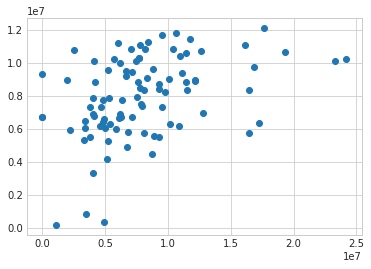

In [426]:
plt.scatter(y_test*100000, lm.predict(X_test)*100000)

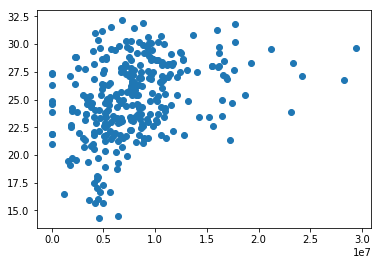

In [16]:
plt.scatter(y*100000, df['Smoking_mean'])

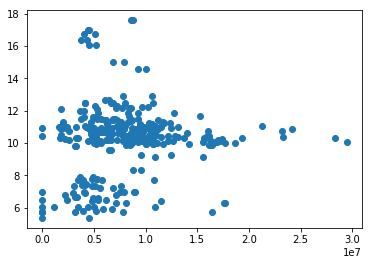

In [17]:
plt.scatter(y*100000, df['Air_mean'])

In [18]:
print("Score:", lm.score(X_test, y_test))

Score: 0.143522948322


In [19]:
kf = KFold(n_splits=5)
kf.get_n_splits(X)

5

In [20]:
# for train_index, test_index in kf.split(X):
#     print("TRAIN:", train_index, "TEST:", test_index)
#     X_train, X_test = X[train_index], X[test_index]
#     y_train, y_test = y[train_index], y[test_index]

In [21]:
scores = cross_val_score(lm, X, y, cv=5)
print(scores)

[-0.16078586 -0.00940225  0.08201307  0.17156502  0.11714465]


In [610]:
df_top10 = pd.read_csv('lung_dataframe_overall3.csv',converters={'Combined': lambda x: str(x),'State-county recode_x': lambda x: str(x)})

In [611]:
df_top10['pop_rank'] = df_top10['2014_x'].rank(ascending=False)
df_top10 = df_top10.iloc[df_top10['pop_rank'].nsmallest(4).index]

In [612]:
df_top10x = df_top10.iloc[:,32:48]
df_top10x.set_index('State_and_county',drop=True, inplace=True)
df_top10y = df_top10x[['2013','2014']]
df_top10x.drop(['2013','2014'], axis=1, inplace=True)

In [613]:
# df_top10y.iloc[0]

In [627]:
import seaborn as sns

lm = LinearRegression()
lm.fit(df_top10x.iloc[0].reshape(1,-1),df_top10y.iloc[0].reshape(1,-1))
sns.regplot(x=df_top10x.index, y=df_top10x.iloc[0].name, data=df_top10x.iloc[0].values)

/home/davidhenslovitz/anaconda2/envs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  after removing the cwd from sys.path.


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

/home/davidhenslovitz/anaconda2/envs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:8: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  


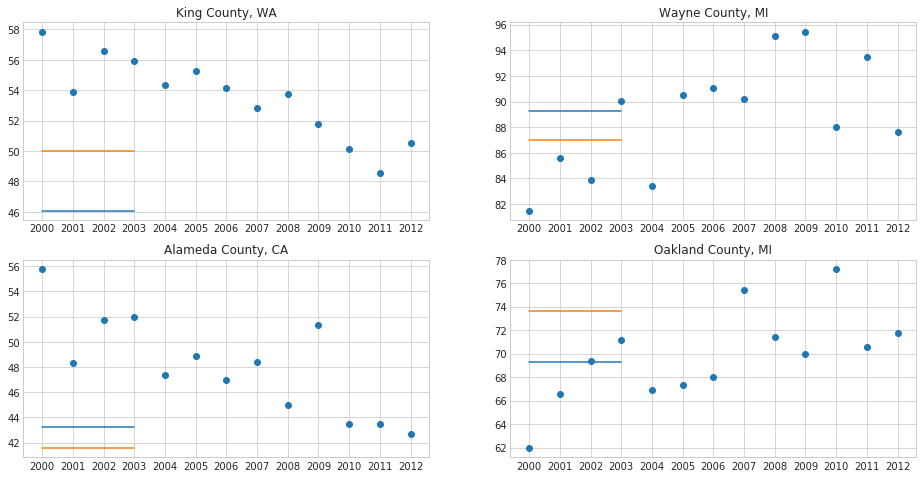

In [623]:
fig = plt.figure(figsize=(16,8))
#fig.set_size_inches(18.5, 12.5, forward=True)
for i in range(4):
    ax = plt.subplot(2,2,i+1)
    ax.scatter(df_top10x.columns, df_top10x.iloc[i])
    ax.set_title(df_top10x.iloc[i].name)
    lm = LinearRegression()
    lm.fit(df_top10x.iloc[i].reshape(1,-1),df_top10y.iloc[i].reshape(1,-1))
    ax.plot(lm.predict(df_top10x.values))

In [595]:
df_top10x.iloc[0]

2000    57.849039
2001    53.874089
2002    56.576362
2003    55.913442
2004    54.357102
2005    55.256374
2006    54.142505
2007    52.814253
2008    53.759427
2009    51.777918
2010    50.162590
2011    48.566626
2012    50.517619
2013    46.053512
Name: King County, WA, dtype: float64

In [22]:
df_overall.head()

,Sex,1996,1997,1998,1999,2000,2001,2002,2003,2004,...,2007,2008,2009,2010,2011,2012,"Annualized rate of change, 1996-2012",State & County,County,State
2,Both,32.2,31.8,31.9,32.1,32.7,35.3,34.6,36.1,35.9,...,31.6,31.7,27.1,27.4,25.7,24.6,-1.7,"Aleutians East Borough, AK",Aleutians East Borough,AK
5,Both,31.5,31.2,31.0,32.0,32.5,34.9,34.5,35.3,35.2,...,32.5,30.5,27.8,27.2,27.2,26.2,-1.1,"Aleutians West Census Area, AK",Aleutians West Census Area,AK
8,Both,24.5,24.1,24.0,23.9,24.0,24.1,24.0,23.7,23.2,...,19.8,18.7,18.8,18.7,19.8,19.1,-1.5,"Anchorage Municipality, AK",Anchorage Municipality,AK
11,Both,31.8,31.4,31.5,33.2,34.1,35.5,36.3,36.5,36.2,...,32.8,32.6,31.9,32.0,33.9,33.1,0.2,"Bethel Census Area, AK",Bethel Census Area,AK
14,Both,27.7,27.3,27.3,27.3,26.3,28.1,30.6,30.7,31.2,...,31.1,31.1,30.5,30.0,28.5,27.7,0.0,"Bristol Bay Borough, AK",Bristol Bay Borough,AK


In [23]:
# grouped = df.groupby('State-county recode_x')[df.columns].sum()

In [91]:
df_grouped = pd.read_csv('lung_dataframe_overall3.csv',converters={'Combined': lambda x: str(x),'State-county recode_x': lambda x: str(x)})

In [92]:
df_grouped[pd.isnull(df_grouped).any(axis=1)]

,Combined,2000_x,2001_x,2002_x,2003_x,2004_x,2005_x,2006_x,2007_x,2008_x,...,2003_air,2004_air,2005_air,2006_air,2007_air,2008_air,2009_air,2010_air,2011_air,radon_mean


In [93]:
df_grouped.head()

,Combined,2000_x,2001_x,2002_x,2003_x,2004_x,2005_x,2006_x,2007_x,2008_x,...,2003_air,2004_air,2005_air,2006_air,2007_air,2008_air,2009_air,2010_air,2011_air,radon_mean
0,06001,1449840.0,1469484.0,1462106.0,1454163.0,1445721.0,1441545.0,1444484.0,1455715.0,1477208.0,...,12.459122,11.617424,11.197772,11.763339,11.182633,13.056139,10.936849,9.255255,10.494480,0.798333
1,06013,952810.0,970952.0,979862.0,987531.0,992424.0,999013.0,1000834.0,1009152.0,1023344.0,...,11.686306,11.280479,9.983341,10.571953,9.570334,11.803685,9.876394,8.734441,9.389413,0.758333
2,06041,247520.0,247866.0,246225.0,245054.0,243769.0,244206.0,244580.0,246248.0,248398.0,...,11.146400,9.742963,9.081322,9.783707,8.996603,12.025891,10.376633,8.938352,9.304906,0.781034
3,06075,777885.0,780865.0,772723.0,766160.0,761325.0,763016.0,768650.0,778673.0,791152.0,...,10.950779,9.899617,9.409567,9.978861,9.455849,12.462528,11.394608,10.127433,10.415150,0.560000
4,06081,707820.0,705621.0,697628.0,693057.0,690161.0,690078.0,690176.0,693849.0,703830.0,...,11.295206,10.347094,10.046294,10.424713,9.848552,11.866283,10.617143,9.180910,9.835359,0.773684


In [94]:
df_grouped.drop('State_and_county', axis=1, inplace=True)

In [95]:
df_grouped.head()

,Combined,2000_x,2001_x,2002_x,2003_x,2004_x,2005_x,2006_x,2007_x,2008_x,...,2003_air,2004_air,2005_air,2006_air,2007_air,2008_air,2009_air,2010_air,2011_air,radon_mean
0,06001,1449840.0,1469484.0,1462106.0,1454163.0,1445721.0,1441545.0,1444484.0,1455715.0,1477208.0,...,12.459122,11.617424,11.197772,11.763339,11.182633,13.056139,10.936849,9.255255,10.494480,0.798333
1,06013,952810.0,970952.0,979862.0,987531.0,992424.0,999013.0,1000834.0,1009152.0,1023344.0,...,11.686306,11.280479,9.983341,10.571953,9.570334,11.803685,9.876394,8.734441,9.389413,0.758333
2,06041,247520.0,247866.0,246225.0,245054.0,243769.0,244206.0,244580.0,246248.0,248398.0,...,11.146400,9.742963,9.081322,9.783707,8.996603,12.025891,10.376633,8.938352,9.304906,0.781034
3,06075,777885.0,780865.0,772723.0,766160.0,761325.0,763016.0,768650.0,778673.0,791152.0,...,10.950779,9.899617,9.409567,9.978861,9.455849,12.462528,11.394608,10.127433,10.415150,0.560000
4,06081,707820.0,705621.0,697628.0,693057.0,690161.0,690078.0,690176.0,693849.0,703830.0,...,11.295206,10.347094,10.046294,10.424713,9.848552,11.866283,10.617143,9.180910,9.835359,0.773684


In [96]:
df_grouped.columns

Index(['Combined', '2000_x', '2001_x', '2002_x', '2003_x', '2004_x', '2005_x',
       '2006_x', '2007_x', '2008_x', '2009_x', '2010_x', '2011_x', '2012_x',
       '2013_x', '2014_x', 'State-county recode_x', '2000_y', '2001_y',
       '2002_y', '2003_y', '2004_y', '2005_y', '2006_y', '2007_y', '2008_y',
       '2009_y', '2010_y', '2011_y', '2012_y', '2013_y', '2014_y', '2000',
       '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009',
       '2010', '2011', '2012', '2013', '2014', '1996_smoking', '1997_smoking',
       '1998_smoking', '1999_smoking', '2000_smoking', '2001_smoking',
       '2002_smoking', '2003_smoking', '2004_smoking', '2005_smoking',
       '2006_smoking', '2007_smoking', '2008_smoking', '2009_smoking',
       '2010_smoking', '2011_smoking', '2012_smoking', '2001_air', '2002_air',
       '2003_air', '2004_air', '2005_air', '2006_air', '2007_air', '2008_air',
       '2009_air', '2010_air', '2011_air', 'radon_mean'],
      dtype='object')

In [97]:
y = df_grouped.pop('2014')
X = df_grouped.iloc[:,32:46]
#X = df_grouped.iloc[:,32:46]

In [98]:
X.head()

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,55.799261,48.316280,51.706237,51.988670,47.381203,48.905861,46.937176,48.429809,44.949662,51.316649,43.468093,43.442753,42.711657,43.249182
1,54.470461,60.250146,53.476918,59.441172,52.195433,52.351671,54.754335,56.780346,52.181867,49.041806,52.045690,54.657821,52.534537,51.918001
2,50.904977,57.692463,67.824145,60.802925,56.200747,54.052726,56.423256,60.508106,60.789539,57.800703,62.079137,55.989945,57.807758,51.827099
3,62.605655,60.189661,62.506228,62.650099,58.319377,63.956719,64.398621,58.946438,54.983113,58.110390,60.435858,52.558651,58.467759,53.169029
4,56.370264,61.222668,50.600033,53.386662,54.769829,56.660262,53.754405,59.234790,50.154157,56.472870,52.918651,51.272560,50.631544,47.859711


In [99]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [100]:
# scaler = preprocessing.StandardScaler()
# X_train.iloc[:,14:] = scaler.fit_transform(X_train.iloc[:,14:])
# X_test.iloc[:,14:] = scaler.fit_transform(X_test.iloc[:,14:]) 

In [101]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [102]:
r2_score(y_test, lm.predict(X_test))

0.13021005751395631

In [103]:
scores = cross_val_score(lm, X, y, cv=5)
print(scores.mean())

0.216951003887


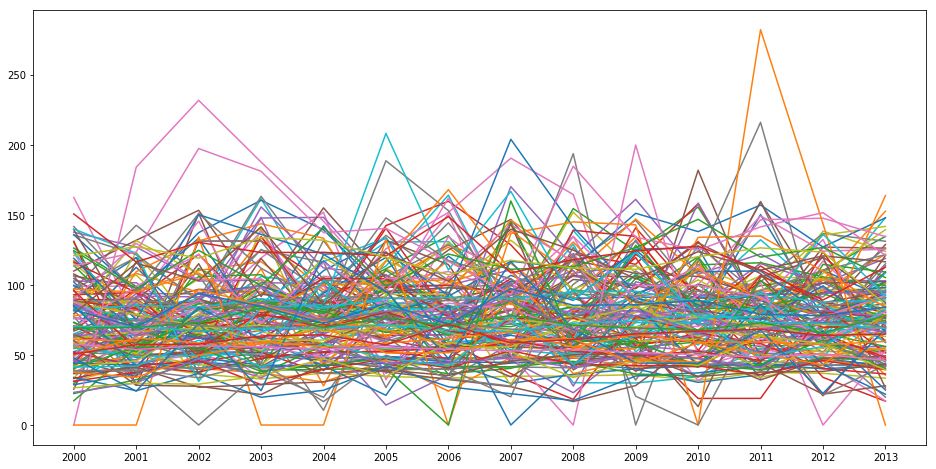

In [104]:
fig = plt.subplots(figsize=(16,8))
for row in X.values:
    plt.plot_date(x=[i for i in X.columns], y=row, fmt="-")

In [190]:
df_state = pd.read_csv('lung_dataframe_overall3.csv',converters={'Combined': lambda x: str(x),'State-county recode_x': lambda x: str(x)})

In [191]:
df_state = df_state.iloc[:,:32]
df_state['St'] = df_state.Combined.str[:2]
df_state = df_state.groupby('St')[df_state.columns].sum()
for i in range(2000, 2015):
    df_state[i] = (df_state[str(i)+"_y"]/df_state[str(i)+"_x"])*100000

df_state.head()    

,2000_x,2001_x,2002_x,2003_x,2004_x,2005_x,2006_x,2007_x,2008_x,2009_x,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
St,,,,,,,,,,,,,,,,,,,,,
06,4135875.0,4174788.0,4158544.0,4145965.0,4133400.0,4137858.0,4148724.0,4183637.0,4243932.0,4302830.0,...,54.110122,53.751467,54.904381,50.354247,53.267268,51.342074,49.877782,50.196922,48.441440,45.539798
13,2261358.0,2308571.0,2337182.0,2363228.0,2392617.0,2432761.0,2505913.0,2564337.0,2611336.0,2646630.0,...,42.462042,42.299952,44.026975,43.234574,44.925056,40.726064,42.628769,44.488097,43.461842,44.164031
19,2914000.0,2917047.0,2919426.0,2927237.0,2939071.0,2949902.0,2968086.0,2984791.0,3002402.0,3018458.0,...,81.595931,80.118972,80.675665,80.901891,81.465437,78.747237,77.248625,77.029351,78.097970,78.955487
26,4044266.0,4044163.0,4032479.0,4023892.0,4011060.0,3992281.0,3968074.0,3936557.0,3902460.0,3877861.0,...,83.536204,83.566990,85.836430,87.483280,86.826217,86.335200,84.684547,81.818695,83.201780,84.963547
35,1746641.0,1757303.0,1782441.0,1806029.0,1832308.0,1861608.0,1891596.0,1920111.0,1940213.0,1966235.0,...,50.601416,48.741909,50.465832,49.221400,48.417407,47.566769,47.338069,48.705744,48.170992,47.422083


In [192]:
X_state = df_state.iloc[:,30:].reset_index()
#y_state = X_state.pop(2014)

In [193]:
X_state.head()

,St,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
0,06,56.578112,56.050750,54.899022,56.488658,52.305608,54.110122,53.751467,54.904381,50.354247,53.267268,51.342074,49.877782,50.196922,48.441440,45.539798
1,13,44.928755,46.002484,46.081135,42.315003,43.926796,42.462042,42.299952,44.026975,43.234574,44.925056,40.726064,42.628769,44.488097,43.461842,44.164031
2,19,76.115305,74.356018,75.836825,79.802216,77.371387,81.595931,80.118972,80.675665,80.901891,81.465437,78.747237,77.248625,77.029351,78.097970,78.955487
3,26,76.898997,80.807821,79.554041,83.923724,80.203238,83.536204,83.566990,85.836430,87.483280,86.826217,86.335200,84.684547,81.818695,83.201780,84.963547
4,35,47.176266,46.264076,50.155938,46.234031,48.572620,50.601416,48.741909,50.465832,49.221400,48.417407,47.566769,47.338069,48.705744,48.170992,47.422083


In [194]:
fips = pd.read_excel('FIPS.xlsx')
fips.FIPS = fips.FIPS.apply(lambda x: str(x).zfill(5))
fips['St'] = fips.FIPS.str[:2]
fips_st = fips.groupby(['State', 'St']).count().reset_index().iloc[:,:2]
fips_st

,State,St
0,AK,02
1,AL,01
2,AR,05
3,AS,60
4,AZ,04
5,CA,06
6,CO,08
7,CT,09
8,DC,11
9,DE,10


In [195]:
X_new = pd.merge(X_state, fips_st, how='left', on='St').iloc[:,1:]
X_new

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,State
0,56.578112,56.050750,54.899022,56.488658,52.305608,54.110122,53.751467,54.904381,50.354247,53.267268,51.342074,49.877782,50.196922,48.441440,45.539798,CA
1,44.928755,46.002484,46.081135,42.315003,43.926796,42.462042,42.299952,44.026975,43.234574,44.925056,40.726064,42.628769,44.488097,43.461842,44.164031,GA
2,76.115305,74.356018,75.836825,79.802216,77.371387,81.595931,80.118972,80.675665,80.901891,81.465437,78.747237,77.248625,77.029351,78.097970,78.955487,IA
3,76.898997,80.807821,79.554041,83.923724,80.203238,83.536204,83.566990,85.836430,87.483280,86.826217,86.335200,84.684547,81.818695,83.201780,84.963547,MI
4,47.176266,46.264076,50.155938,46.234031,48.572620,50.601416,48.741909,50.465832,49.221400,48.417407,47.566769,47.338069,48.705744,48.170992,47.422083,NM
5,64.150995,63.816614,65.112783,65.915244,64.255403,64.388010,65.077495,64.879438,63.722114,64.776151,64.722153,62.268083,62.499429,60.044146,62.759854,WA


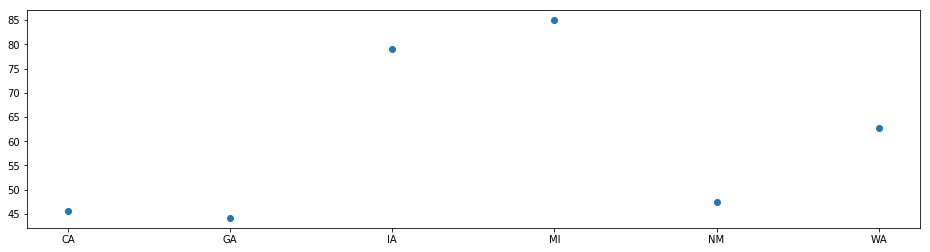

In [196]:
fig = plt.subplots(figsize = (16, 4))
plt.scatter(X_new.State,X_new[2014])

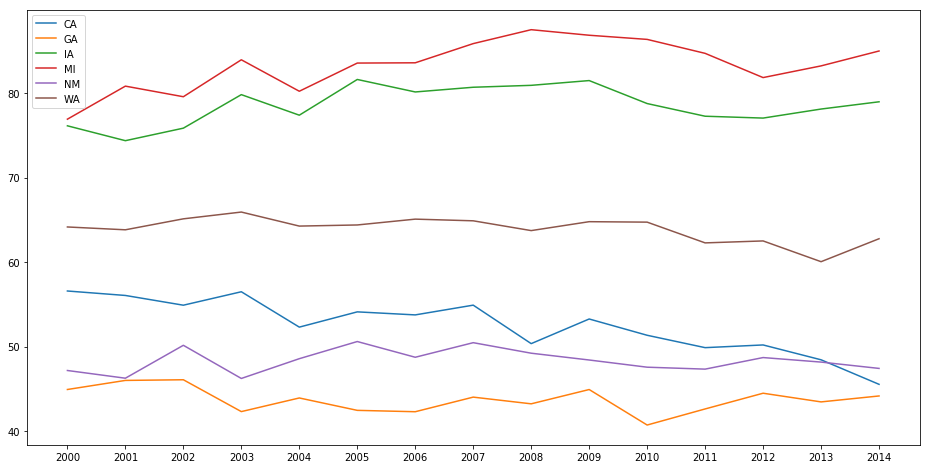

In [198]:
fig = plt.subplots(figsize=(16,8))
# X_new = X_new.iloc[:,:15]
for row in X_new.iloc[:,:15].values:
    plt.plot_date(x=[i for i in X_new.columns[:15].astype(str)], y=row, fmt="-")
plt.legend(X_new['State'])

In [184]:
X_new.columns

Index([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
       2012, 2013, 2014],
      dtype='object')

In [205]:
X_new['Percent_change'] = ((X_new[2014]-X_new[2000])/X_new[2000])*100
X_new['CAGR'] = ((X_new[2014]/X_new[2000])**(1/15)-1)*100

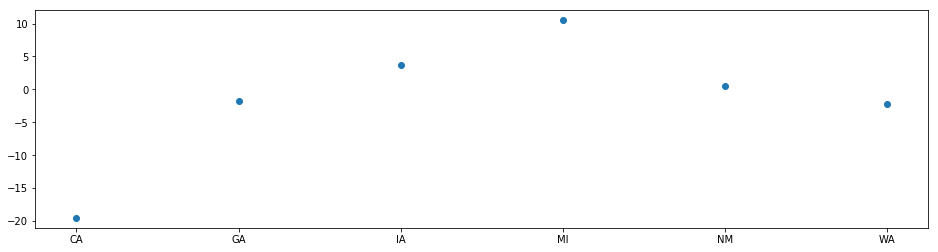

In [207]:
fig, ax = plt.subplots(figsize = (16, 4))
ax.scatter(X_new.State,X_new['Percent_change'])
#ax.scatter(X_new.State,X_new['CAGR'])

In [257]:
df_state2 = pd.read_csv('lung_dataframe_overall.csv',converters={'Combined': lambda x: str(x),'State-county recode_x': lambda x: str(x)})

In [258]:
df_state2 = df_state2.iloc[:,:32]
df_state2.head()

,Combined,2000_x,2001_x,2002_x,2003_x,2004_x,2005_x,2006_x,2007_x,2008_x,...,2005_y,2006_y,2007_y,2008_y,2009_y,2010_y,2011_y,2012_y,2013_y,2014_y
0,06001,1449840.0,1469484.0,1462106.0,1454163.0,1445721.0,1441545.0,1444484.0,1455715.0,1477208.0,...,705.0,678.0,705.0,664.0,769.0,658.0,666.0,665.0,685.0,670.0
1,06013,952810.0,970952.0,979862.0,987531.0,992424.0,999013.0,1000834.0,1009152.0,1023344.0,...,523.0,548.0,573.0,534.0,509.0,548.0,583.0,567.0,569.0,497.0
2,06041,247520.0,247866.0,246225.0,245054.0,243769.0,244206.0,244580.0,246248.0,248398.0,...,132.0,138.0,149.0,151.0,145.0,157.0,143.0,148.0,134.0,152.0
3,06075,777885.0,780865.0,772723.0,766160.0,761325.0,763016.0,768650.0,778673.0,791152.0,...,488.0,495.0,459.0,435.0,466.0,487.0,429.0,485.0,447.0,443.0
4,06081,707820.0,705621.0,697628.0,693057.0,690161.0,690078.0,690176.0,693849.0,703830.0,...,391.0,371.0,411.0,353.0,403.0,381.0,374.0,375.0,359.0,331.0


In [259]:
df_state2['St'] = df_state2.Combined.str[:2]
df_state2 = df_state2.groupby('St')[df_state2.columns].sum()
for i in range(2000, 2015):
    df_state2[i] = (df_state2[str(i)+"_y"]/df_state2[str(i)+"_x"])*100000
df_state2 = df_state2.iloc[:,30:]
df_state2   

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
St,,,,,,,,,,,,,,,
06,56.578112,56.050750,54.899022,56.488658,52.305608,54.110122,53.751467,54.904381,50.354247,53.267268,51.342074,49.877782,50.196922,48.441440,45.539798
09,72.308360,74.253496,76.067966,76.542561,73.882453,74.737179,77.157949,76.376348,76.517827,74.849648,74.307550,73.876826,74.578250,76.810424,73.495825
13,44.928755,46.002484,46.081135,42.315003,43.926796,42.462042,42.299952,44.026975,43.234574,44.925056,40.726064,42.628769,44.488097,43.461842,44.164031
19,76.115305,74.356018,75.836825,79.802216,77.371387,81.595931,80.118972,80.675665,80.901891,81.465437,78.747237,77.248625,77.029351,78.097970,78.955487
26,76.898997,80.807821,79.554041,83.923724,80.203238,83.536204,83.566990,85.836430,87.483280,86.826217,86.335200,84.684547,81.818695,83.201780,84.963547
35,46.123334,44.876589,48.563339,45.164665,47.326201,49.423632,47.397302,49.093750,47.844939,47.132711,46.155910,46.481951,47.150987,46.959830,46.078596
49,19.603458,22.200669,20.947903,23.134250,21.277659,22.785355,22.648918,21.210696,19.263778,23.095952,20.933723,23.291815,24.366821,21.421056,21.022259
53,64.272785,63.885958,65.003889,65.897386,64.239221,64.463633,65.033039,64.789081,63.701283,64.772225,64.674197,62.314227,62.502000,60.116637,62.738050


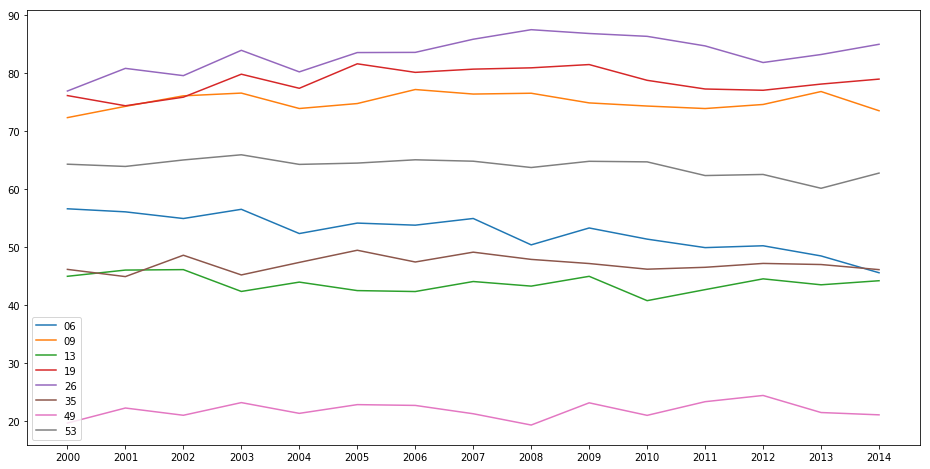

In [260]:
fig = plt.subplots(figsize=(16,8))
# X_new = X_new.iloc[:,:15]
for row in df_state2.values:
    plt.plot_date(x=[i for i in df_state2.columns.astype(str)], y=row, fmt="-")
plt.legend(df_state2.index)

In [376]:
df = pd.read_csv('lung_dataframe_overall.csv',converters={'Combined': lambda x: str(x),'State-county recode_x': lambda x: str(x)})

In [377]:
df['FIPS'] = df.Combined.astype(str)
# fips['FIPS'] = fips.FIPS.astype(str)
df_box1 = pd.merge(df, fips, how='left', on='FIPS')
df_box1.head()

,Combined,2000_x,2001_x,2002_x,2003_x,2004_x,2005_x,2006_x,2007_x,2008_x,...,2006_air,2007_air,2008_air,2009_air,2010_air,2011_air,FIPS,Name,State,St
0,06001,1449840.0,1469484.0,1462106.0,1454163.0,1445721.0,1441545.0,1444484.0,1455715.0,1477208.0,...,11.763339,11.182633,13.056139,10.936849,9.255255,10.494480,06001,Alameda,CA,06
1,06013,952810.0,970952.0,979862.0,987531.0,992424.0,999013.0,1000834.0,1009152.0,1023344.0,...,10.571953,9.570334,11.803685,9.876394,8.734441,9.389413,06013,Contra Costa,CA,06
2,06041,247520.0,247866.0,246225.0,245054.0,243769.0,244206.0,244580.0,246248.0,248398.0,...,9.783707,8.996603,12.025891,10.376633,8.938352,9.304906,06041,Marin,CA,06
3,06075,777885.0,780865.0,772723.0,766160.0,761325.0,763016.0,768650.0,778673.0,791152.0,...,9.978861,9.455849,12.462528,11.394608,10.127433,10.415150,06075,San Francisco,CA,06
4,06081,707820.0,705621.0,697628.0,693057.0,690161.0,690078.0,690176.0,693849.0,703830.0,...,10.424713,9.848552,11.866283,10.617143,9.180910,9.835359,06081,San Mateo,CA,06


In [378]:
df_box = df_box1[['Name', 'State', '2000', '2001', '2002', '2003', '2004', '2005', '2006','2007','2008','2009','2010','2011','2012','2013','2014']]

In [379]:
df_box['mean'] = df_box.iloc[:,2:].mean(axis=1)
df_box.head()

/home/davidhenslovitz/anaconda2/envs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,Name,State,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,mean
0,Alameda,CA,55.799261,48.316280,51.706237,51.988670,47.381203,48.905861,46.937176,48.429809,44.949662,51.316649,43.468093,43.442753,42.711657,43.249182,41.541371,47.342924
1,Contra Costa,CA,54.470461,60.250146,53.476918,59.441172,52.195433,52.351671,54.754335,56.780346,52.181867,49.041806,52.045690,54.657821,52.534537,51.918001,44.705904,53.387074
2,Marin,CA,50.904977,57.692463,67.824145,60.802925,56.200747,54.052726,56.423256,60.508106,60.789539,57.800703,62.079137,55.989945,57.807758,51.827099,58.338131,57.936110
3,San Francisco,CA,62.605655,60.189661,62.506228,62.650099,58.319377,63.956719,64.398621,58.946438,54.983113,58.110390,60.435858,52.558651,58.467759,53.169029,51.962554,58.884010
4,San Mateo,CA,56.370264,61.222668,50.600033,53.386662,54.769829,56.660262,53.754405,59.234790,50.154157,56.472870,52.918651,51.272560,50.631544,47.859711,43.648371,53.263785


In [380]:
#plt.boxplot(df_box.iloc[:,2:])
#df_box.iloc[:,2:]
df_box_2014 = df_box[['Name','State','2014']]
df_box_mean = df_box[['Name','State','mean']]

In [381]:
import seaborn as sns
sns.set_style("whitegrid")

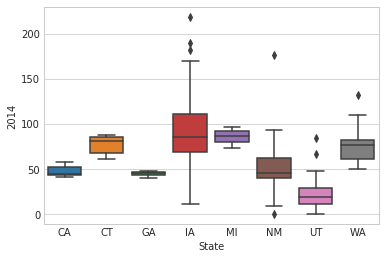

In [382]:
#sns.boxplot(df_box.Name, df_box.iloc[:,2:])
sns.boxplot(x='State', y='2014', data=df_box_2014)

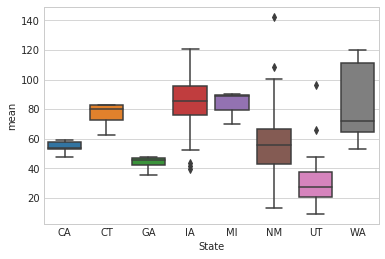

In [383]:
#Doesnt include all counties in state - only where all the data exists
sns.boxplot(x='State', y='mean', data=df_box_mean)

In [384]:
# counties per state
df_box.groupby('State')['Name'].count()

State
CA     5
CT     8
GA     4
IA    98
MI     3
NM    33
UT    29
WA    13
Name: Name, dtype: int64

In [407]:
df_box1['pop_rank'] = df_box1['2014_x'].rank(ascending=False)
# df_box_group = pd.DataFrame(df_box1.groupby('State')['pop_rank'].nsmallest(3)).reset_index()
# df_box_group.head(20)
df_box1.head(20)

,Combined,2000_x,2001_x,2002_x,2003_x,2004_x,2005_x,2006_x,2007_x,2008_x,...,2007_air,2008_air,2009_air,2010_air,2011_air,FIPS,Name,State,St,pop_rank
0,06001,1449840.0,1469484.0,1462106.0,1454163.0,1445721.0,1441545.0,1444484.0,1455715.0,1477208.0,...,11.182633,13.056139,10.936849,9.255255,10.494480,06001,Alameda,CA,06,3.0
1,06013,952810.0,970952.0,979862.0,987531.0,992424.0,999013.0,1000834.0,1009152.0,1023344.0,...,9.570334,11.803685,9.876394,8.734441,9.389413,06013,Contra Costa,CA,06,5.0
2,06041,247520.0,247866.0,246225.0,245054.0,243769.0,244206.0,244580.0,246248.0,248398.0,...,8.996603,12.025891,10.376633,8.938352,9.304906,06041,Marin,CA,06,25.0
3,06075,777885.0,780865.0,772723.0,766160.0,761325.0,763016.0,768650.0,778673.0,791152.0,...,9.455849,12.462528,11.394608,10.127433,10.415150,06075,San Francisco,CA,06,13.0
4,06081,707820.0,705621.0,697628.0,693057.0,690161.0,690078.0,690176.0,693849.0,703830.0,...,9.848552,11.866283,10.617143,9.180910,9.835359,06081,San Mateo,CA,06,16.0
5,09001,884364.0,889063.0,892900.0,896342.0,897472.0,897653.0,896254.0,897498.0,903824.0,...,11.775296,11.069675,9.468191,8.993251,11.043931,09001,Fairfield,CT,09,8.0
6,09003,858416.0,862573.0,867451.0,873335.0,874449.0,878081.0,881298.0,884548.0,887891.0,...,10.104201,10.089404,8.567974,8.001134,9.287691,09003,Hartford,CT,09,9.0
7,09005,182597.0,184118.0,185974.0,187424.0,188601.0,188912.0,189682.0,189866.0,190175.0,...,10.747246,9.899266,8.408623,7.738025,8.256915,09005,Litchfield,CT,09,31.0
8,09007,155593.0,157006.0,159187.0,160864.0,161450.0,162191.0,163473.0,164129.0,164962.0,...,11.376277,10.848734,9.283196,8.706501,9.887861,09007,Middlesex,CT,09,33.0
9,09009,824911.0,829875.0,835099.0,841939.0,844505.0,847162.0,850207.0,853598.0,856622.0,...,12.025214,11.771350,10.101162,9.320940,10.457473,09009,New Haven,CT,09,12.0


In [408]:
#Plot Top 3 counties per state
#sns.boxplot(x='State', y='mean', data=df_box_mean)

In [410]:
df_air = pd.read_csv('lung_dataframe_overall.csv',converters={'Combined': lambda x: str(x),'State-county recode_x': lambda x: str(x)})

In [411]:
df_air.head()

,Combined,2000_x,2001_x,2002_x,2003_x,2004_x,2005_x,2006_x,2007_x,2008_x,...,2002_air,2003_air,2004_air,2005_air,2006_air,2007_air,2008_air,2009_air,2010_air,2011_air
0,06001,1449840.0,1469484.0,1462106.0,1454163.0,1445721.0,1441545.0,1444484.0,1455715.0,1477208.0,...,14.190016,12.459122,11.617424,11.197772,11.763339,11.182633,13.056139,10.936849,9.255255,10.494480
1,06013,952810.0,970952.0,979862.0,987531.0,992424.0,999013.0,1000834.0,1009152.0,1023344.0,...,13.294607,11.686306,11.280479,9.983341,10.571953,9.570334,11.803685,9.876394,8.734441,9.389413
2,06041,247520.0,247866.0,246225.0,245054.0,243769.0,244206.0,244580.0,246248.0,248398.0,...,11.599598,11.146400,9.742963,9.081322,9.783707,8.996603,12.025891,10.376633,8.938352,9.304906
3,06075,777885.0,780865.0,772723.0,766160.0,761325.0,763016.0,768650.0,778673.0,791152.0,...,12.271501,10.950779,9.899617,9.409567,9.978861,9.455849,12.462528,11.394608,10.127433,10.415150
4,06081,707820.0,705621.0,697628.0,693057.0,690161.0,690078.0,690176.0,693849.0,703830.0,...,12.363100,11.295206,10.347094,10.046294,10.424713,9.848552,11.866283,10.617143,9.180910,9.835359


In [ ]:
df_air = df_air[['2001_air','2002_air','2003_air','2004_air','2005_air']]